# Task 1 Notebook for "insert model name here"

## Imports and Setup

**Import the Libararies**

In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Connecting to Google Drive

In [2]:

# drive.mount('/content/drive')

### Reading data set files

In [4]:
# Developers please update the paths according to were in your google you place datasets
# i recommend making Rootcode-ML folder and in it Datasets folder and placing the csv files there then you wont have to change below code block
bookings_data = pd.read_csv('./dataset/bookings_train.csv')
tasks_data = pd.read_csv('./dataset/tasks.csv')
staffing_data = pd.read_csv('./dataset/staffing_train.csv')

bookings_data.head()

In [5]:
staffing_data.head()

,date,section_id,employees_on_duty,total_task_time_minutes
0,2021-01-01,SEC-001,1,834.569483
1,2021-01-01,SEC-002,4,1525.368990
2,2021-01-01,SEC-003,2,662.095279
3,2021-01-01,SEC-004,4,1499.112620
4,2021-01-01,SEC-005,3,1238.533073


In [6]:
tasks_data.head()

,task_id,task_name,section_id,section_name
0,TASK-001,Register new motor vehicles and issue registra...,SEC-001,Vehicle Registration
1,TASK-002,Process the transfer of vehicle ownership.,SEC-001,Vehicle Registration
2,TASK-003,Conduct theoretical and practical examinations...,SEC-002,Driver Licensing
3,TASK-004,Process the renewal and reissue of driving lic...,SEC-002,Driver Licensing
4,TASK-005,Issue international driving permits.,SEC-002,Driver Licensing


## EDA

### EDA of Bookings data

lets take a look at the columns and some of their values

In [7]:
bookings_data.head()

,booking_id,citizen_id,booking_date,appointment_date,appointment_time,check_in_time,check_out_time,task_id,num_documents,queue_number,satisfaction_rating
0,f7b59ba3793fea61282cb02be2247cebd0a75306,4229044420,2021-01-01,2021-01-01,09:03,2021-01-01 09:11:00,2021-01-01 09:48:15.166353269,TASK-002,0,2,4
1,cfe30d53b4b645e4cb6b114f6c9d74a0f25e6a80,5389442635,2021-01-01,2021-01-01,09:12,2021-01-01 09:24:00,2021-01-01 10:24:12.189261137,TASK-001,1,1,4
2,0fb0a5d9b3944dd743a9e7828dc03fa74aa6ebf8,2123783919,2021-01-01,2021-01-01,09:36,2021-01-01 09:29:00,2021-01-01 10:26:48.802260864,TASK-002,1,6,5
3,d4bf826153212fa325ad98b215668ab942365607,6359918966,2021-01-01,2021-01-01,09:45,2021-01-01 10:07:00,2021-01-01 11:00:13.485642822,TASK-001,1,4,4
4,ebb4c9687acbaf65376d8e379bd1341d1c15127e,178732202,2021-01-01,2021-01-01,10:12,2021-01-01 10:26:00,2021-01-01 11:54:53.260180213,TASK-002,1,8,3


In [8]:
bookings_data.describe()

,citizen_id,num_documents,queue_number,satisfaction_rating
count,2.036930e+05,203693.000000,203693.000000,203693.000000
mean,4.996145e+09,2.436790,9.310511,4.187277
std,2.880985e+09,1.734511,8.245711,0.463539
min,4.318100e+04,0.000000,1.000000,3.000000
25%,2.504323e+09,1.000000,3.000000,4.000000
50%,4.995536e+09,2.000000,7.000000,4.000000
75%,7.491514e+09,3.000000,13.000000,4.000000
max,9.999975e+09,14.000000,133.000000,5.000000


removing unnecessary columns. We wont need the num_documents, queue_number and satisfication_rating because these data wont be provided as input from the test datasets. We need the checkin and checkout times because they will be to calculate the actual target value (the thing to be predicted) for task 1.

In [9]:
bookings_data = bookings_data.drop(['num_documents','queue_number','satisfaction_rating'],axis=1)

now lets look at the new table headers again.

In [10]:
bookings_data.head()

,booking_id,citizen_id,booking_date,appointment_date,appointment_time,check_in_time,check_out_time,task_id
0,f7b59ba3793fea61282cb02be2247cebd0a75306,4229044420,2021-01-01,2021-01-01,09:03,2021-01-01 09:11:00,2021-01-01 09:48:15.166353269,TASK-002
1,cfe30d53b4b645e4cb6b114f6c9d74a0f25e6a80,5389442635,2021-01-01,2021-01-01,09:12,2021-01-01 09:24:00,2021-01-01 10:24:12.189261137,TASK-001
2,0fb0a5d9b3944dd743a9e7828dc03fa74aa6ebf8,2123783919,2021-01-01,2021-01-01,09:36,2021-01-01 09:29:00,2021-01-01 10:26:48.802260864,TASK-002
3,d4bf826153212fa325ad98b215668ab942365607,6359918966,2021-01-01,2021-01-01,09:45,2021-01-01 10:07:00,2021-01-01 11:00:13.485642822,TASK-001
4,ebb4c9687acbaf65376d8e379bd1341d1c15127e,178732202,2021-01-01,2021-01-01,10:12,2021-01-01 10:26:00,2021-01-01 11:54:53.260180213,TASK-002


lets get a better idea of how null values have been distributed amoung the columns

In [11]:
bookings_data.isna().sum()

booking_id             0
citizen_id             0
booking_date           0
appointment_date       0
appointment_time       0
check_in_time       6092
check_out_time      6092
task_id                0
dtype: int64

Now, to see how the null distribution is like task-wise we will plot the following

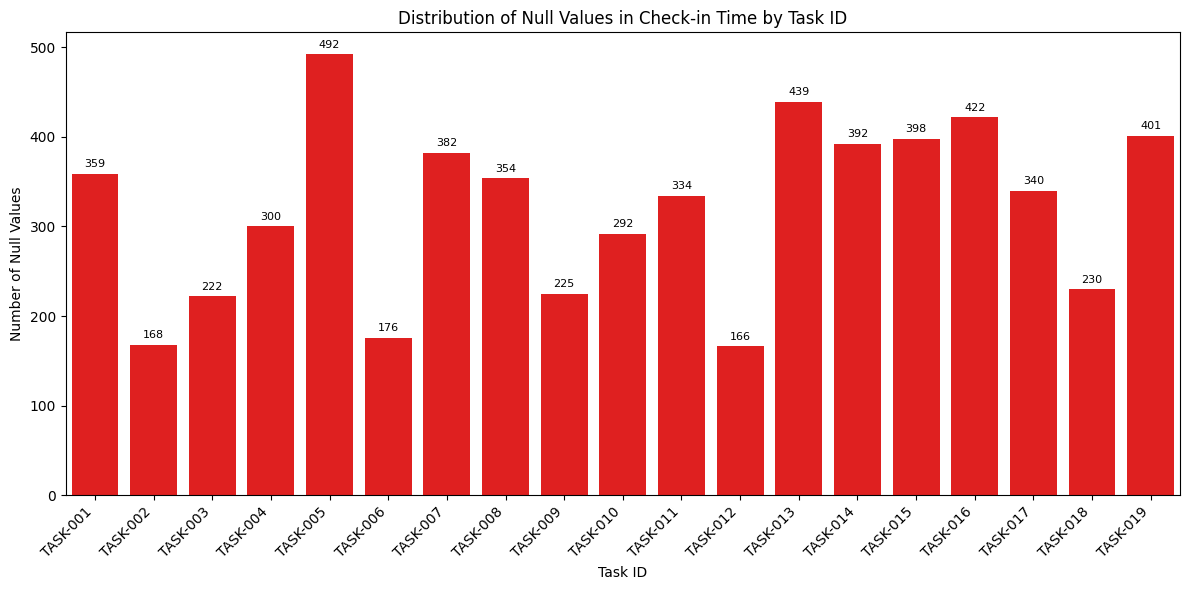

In [12]:
# Group by task_id and count null values in 'check_in_time'
null_counts_by_task = bookings_data.groupby('task_id')['check_in_time'].apply(lambda x: x.isnull().sum())

# Plot the distribution of null values by task_id
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=null_counts_by_task.index, y=null_counts_by_task.values, color='red')
plt.title('Distribution of Null Values in Check-in Time by Task ID')
plt.xlabel('Task ID')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')

# Add the count of null values above each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

now lets see how this looks like when comaparing with the total number of records per task

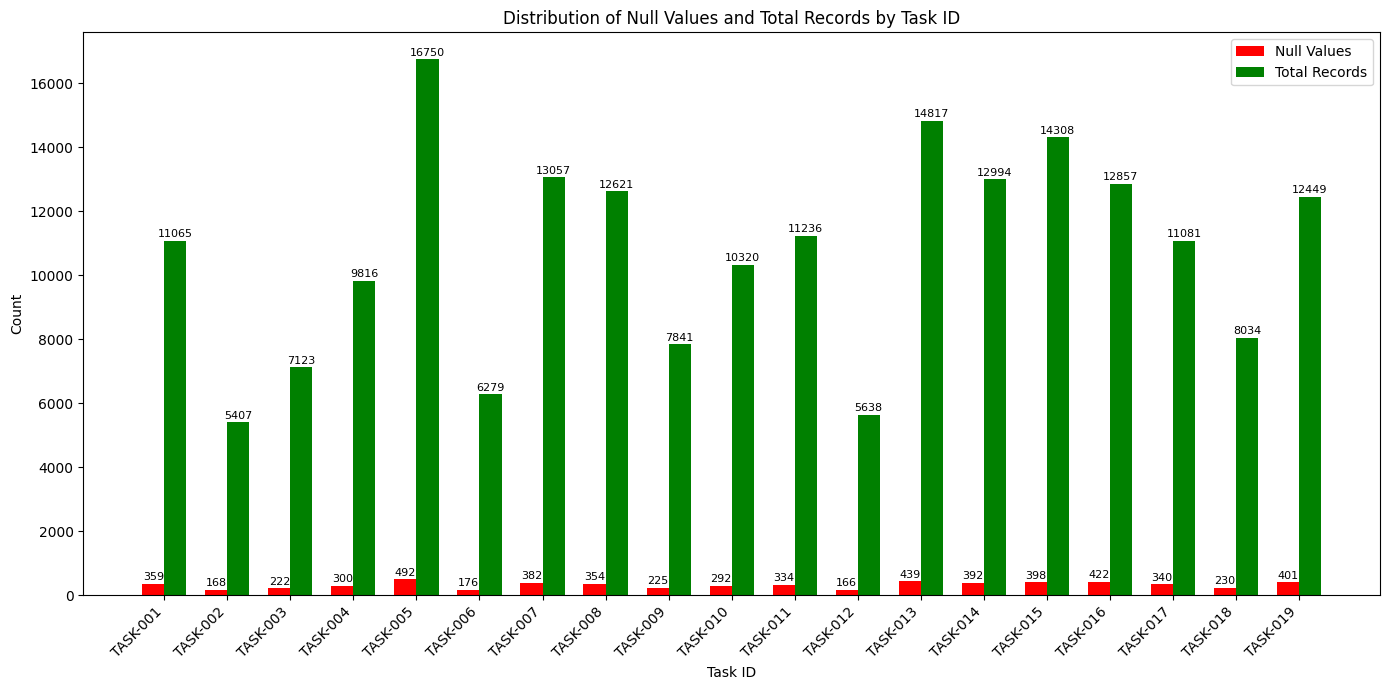

In [13]:
# Group by task_id and count null values in 'check_in_time'
null_counts_by_task = bookings_data.groupby('task_id')['check_in_time'].apply(lambda x: x.isnull().sum())

# Group by task_id and count total records
total_counts_by_task = bookings_data.groupby('task_id').size()

# Combine the data for plotting
combined_counts = pd.DataFrame({
    'Null Values': null_counts_by_task,
    'Total Records': total_counts_by_task
})

# Plot the distribution of null values and total records by task_id
plt.figure(figsize=(14, 7))
bar_width = 0.35
index = range(len(combined_counts.index))

bars1 = plt.bar(index, combined_counts['Null Values'], bar_width, label='Null Values', color='red')
bars2 = plt.bar([i + bar_width for i in index], combined_counts['Total Records'], bar_width, label='Total Records', color='green')

plt.xlabel('Task ID')
plt.ylabel('Count')
plt.title('Distribution of Null Values and Total Records by Task ID')
plt.xticks([i + bar_width/2 for i in index], combined_counts.index, rotation=45, ha='right')
plt.legend()

# Add the count of null values above each red bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom', fontsize=8)

# Add the total number of records above each green bar
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## Data Preprocessing

### Rearrangement and processing of columns

the appointment_time column will be renamed as time as this is the column that is present in the test dataset and it keeps things simple. Next the check_in_time and the check_out_time have to be combined to get a single column called true_processing_time_minutes. the task_id will remain the same. the appointment_date will be changed to date. These changes will make it easier for testing and training purposes. Also the citizen_id and booking_id columns will be removed so as to not have the model misunderstand that these columns actually have an effect.

In [14]:
# Create a copy to avoid modifying the original DataFrame
edited_bookings_data = bookings_data.copy()

# Rename columns
edited_bookings_data = edited_bookings_data.rename(columns={
    'appointment_time': 'time',
    'appointment_date': 'date'
})

# Convert time columns to datetime objects
edited_bookings_data['check_in_time'] = pd.to_datetime(edited_bookings_data['check_in_time'])
edited_bookings_data['check_out_time'] = pd.to_datetime(edited_bookings_data['check_out_time'])

# Calculate the time difference in minutes, handling potential NaT values
edited_bookings_data['true_processing_time_minutes'] = (edited_bookings_data['check_out_time'] - edited_bookings_data['check_in_time']).dt.total_seconds() / 60

# Drop the original time columns and the requested columns
edited_bookings_data = edited_bookings_data.drop(['check_in_time', 'check_out_time', 'booking_date', 'citizen_id', 'booking_id'], axis=1)

# Display the first few rows of the new DataFrame
display(edited_bookings_data.head())

,date,time,task_id,true_processing_time_minutes
0,2021-01-01,09:03,TASK-002,37.252773
1,2021-01-01,09:12,TASK-001,60.203154
2,2021-01-01,09:36,TASK-002,57.813371
3,2021-01-01,09:45,TASK-001,53.224761
4,2021-01-01,10:12,TASK-002,88.887670


### Dataset seperation according to task_id

The number of records per task is as follows.

In [15]:
task_counts = bookings_data.groupby("task_id").size().reset_index(name="count")
task_counts

,task_id,count
0,TASK-001,11065
1,TASK-002,5407
2,TASK-003,7123
3,TASK-004,9816
4,TASK-005,16750
5,TASK-006,6279
6,TASK-007,13057
7,TASK-008,12621
8,TASK-009,7841
9,TASK-010,10320


As you can see the minimum number of records per task is 5407. So we have plenty of data to workwith.

Therefore, the plan is to train 19 different models to solve Task 1 to get the best results possible per task, and so the dataset will be split into 19 datasets.

In [16]:
task_1_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-001'].copy()
task_2_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-002'].copy()
task_3_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-003'].copy()
task_4_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-004'].copy()
task_5_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-005'].copy()
task_6_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-006'].copy()
task_7_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-007'].copy()
task_8_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-008'].copy()
task_9_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-009'].copy()
task_10_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-010'].copy()
task_11_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-011'].copy()
task_12_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-012'].copy()
task_13_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-013'].copy()
task_14_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-014'].copy()
task_15_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-015'].copy()
task_16_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-016'].copy()
task_17_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-017'].copy()
task_18_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-018'].copy()
task_19_data = edited_bookings_data[edited_bookings_data['task_id'] == 'TASK-019'].copy()

lets verify whether the split worked

In [17]:
task_1_data.head()

,date,time,task_id,true_processing_time_minutes
1,2021-01-01,09:12,TASK-001,60.203154
3,2021-01-01,09:45,TASK-001,53.224761
7,2021-01-01,10:29,TASK-001,58.550172
8,2021-01-01,10:38,TASK-001,60.147629
198,2021-01-04,09:13,TASK-001,58.843320


Splitting the each and every dataset into train and test set

In [20]:
def train_test_split_of_task_data(dataset, split_ratio=0.2):
    train_data, test_data = train_test_split(dataset, test_size=split_ratio, random_state=42)
    return train_data, test_data

In [21]:
task_1_train, task_1_test = train_test_split_of_task_data(task_1_data)
task_2_train, task_2_test = train_test_split_of_task_data(task_2_data)
task_3_train, task_3_test = train_test_split_of_task_data(task_3_data)
task_4_train, task_4_test = train_test_split_of_task_data(task_4_data)
task_5_train, task_5_test = train_test_split_of_task_data(task_5_data)
task_6_train, task_6_test = train_test_split_of_task_data(task_6_data)
task_7_train, task_7_test = train_test_split_of_task_data(task_7_data)
task_8_train, task_8_test = train_test_split_of_task_data(task_8_data)
task_9_train, task_9_test = train_test_split_of_task_data(task_9_data)
task_10_train, task_10_test = train_test_split_of_task_data(task_10_data)
task_11_train, task_11_test = train_test_split_of_task_data(task_11_data)
task_12_train, task_12_test = train_test_split_of_task_data(task_12_data)
task_13_train, task_13_test = train_test_split_of_task_data(task_13_data)
task_14_train, task_14_test = train_test_split_of_task_data(task_14_data)
task_15_train, task_15_test = train_test_split_of_task_data(task_15_data)
task_16_train, task_16_test = train_test_split_of_task_data(task_16_data)
task_17_train, task_17_test = train_test_split_of_task_data(task_17_data)
task_18_train, task_18_test = train_test_split_of_task_data(task_18_data)
task_19_train, task_19_test = train_test_split_of_task_data(task_19_data)

visualising one train and test set from one task

In [23]:
task_1_train.head()

,date,time,task_id,true_processing_time_minutes
9429,2021-03-15,09:06,TASK-001,55.683179
53393,2022-01-19,15:41,TASK-001,72.850935
158733,2024-02-12,09:38,TASK-001,42.075628
84211,2022-09-02,11:00,TASK-001,92.086224
129971,2023-07-28,14:18,TASK-001,84.964657


creating an arrary of train datasets for easy use

In [24]:
all_train_datasets_for_tasks = [
    task_1_train,
    task_2_train,
    task_3_train,
    task_4_train,
    task_5_train,
    task_6_train,
    task_7_train,
    task_8_train,
    task_9_train,
    task_10_train,
    task_11_train,
    task_12_train,
    task_13_train,
    task_14_train,
    task_15_train,
    task_16_train,
    task_17_train,
    task_18_train,
    task_19_train
]

checking for null values within the train set

In [26]:
for i, train_data in enumerate(all_train_datasets_for_tasks, start=1):
    null_count = train_data.isnull().sum().sum()
    print(f"Task {i} Train Set - Total Null Values: {null_count}")

Task 1 Train Set - Total Null Values: 284
Task 2 Train Set - Total Null Values: 129
Task 3 Train Set - Total Null Values: 169
Task 4 Train Set - Total Null Values: 237
Task 5 Train Set - Total Null Values: 402
Task 6 Train Set - Total Null Values: 144
Task 7 Train Set - Total Null Values: 319
Task 8 Train Set - Total Null Values: 291
Task 9 Train Set - Total Null Values: 178
Task 10 Train Set - Total Null Values: 229
Task 11 Train Set - Total Null Values: 271
Task 12 Train Set - Total Null Values: 132
Task 13 Train Set - Total Null Values: 352
Task 14 Train Set - Total Null Values: 317
Task 15 Train Set - Total Null Values: 325
Task 16 Train Set - Total Null Values: 347
Task 17 Train Set - Total Null Values: 278
Task 18 Train Set - Total Null Values: 180
Task 19 Train Set - Total Null Values: 317


checking total data count of each train set

In [27]:
for i, train_data in enumerate(all_train_datasets_for_tasks, start=1):
    total_count = train_data.shape[0]
    print(f"Task {i} Train Set - Total Rows: {total_count}")

Task 1 Train Set - Total Rows: 8852
Task 2 Train Set - Total Rows: 4325
Task 3 Train Set - Total Rows: 5698
Task 4 Train Set - Total Rows: 7852
Task 5 Train Set - Total Rows: 13400
Task 6 Train Set - Total Rows: 5023
Task 7 Train Set - Total Rows: 10445
Task 8 Train Set - Total Rows: 10096
Task 9 Train Set - Total Rows: 6272
Task 10 Train Set - Total Rows: 8256
Task 11 Train Set - Total Rows: 8988
Task 12 Train Set - Total Rows: 4510
Task 13 Train Set - Total Rows: 11853
Task 14 Train Set - Total Rows: 10395
Task 15 Train Set - Total Rows: 11446
Task 16 Train Set - Total Rows: 10285
Task 17 Train Set - Total Rows: 8864
Task 18 Train Set - Total Rows: 6427
Task 19 Train Set - Total Rows: 9959


There fore removing the null values from the train set won't be much of a issue

In [30]:
# Remove rows with null values from each train set
for i in range(19):
    all_train_datasets_for_tasks[i] = all_train_datasets_for_tasks[i].dropna().reset_index(drop=True)

In [ ]:
for name, df in [
    ("task_18_train", task_18_train),
    ("task_19_train", task_19_train),
    ("task_1_train", task_1_train),
    ("task_2_train", task_2_train),
    ("task_3_train", task_3_train),
    ("task_4_train", task_4_train),
    ("task_5_train", task_5_train),
    ("task_6_train", task_6_train),
    ("task_7_train", task_7_train),
    ("task_8_train", task_8_train),
    ("task_9_train", task_9_train),
]:
    null_count = df.isnull().sum().sum()
    print(f"{name}: {null_count} null values")


checking whether null values are still there

In [31]:
task_1_train.isnull().sum()

date                              0
time                              0
task_id                           0
true_processing_time_minutes    284
dtype: int64

checking for outliers in every dataset

Task 1 Train Set - Outlier Count: 20


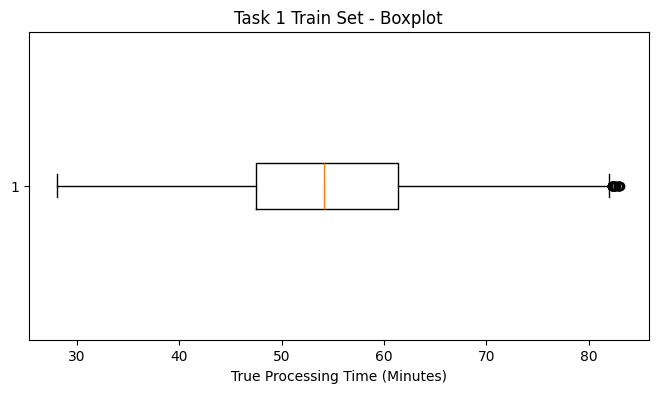

Task 2 Train Set - Outlier Count: 10


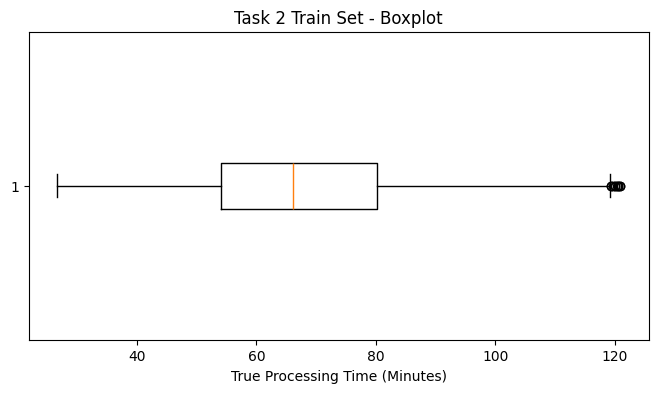

Task 3 Train Set - Outlier Count: 26


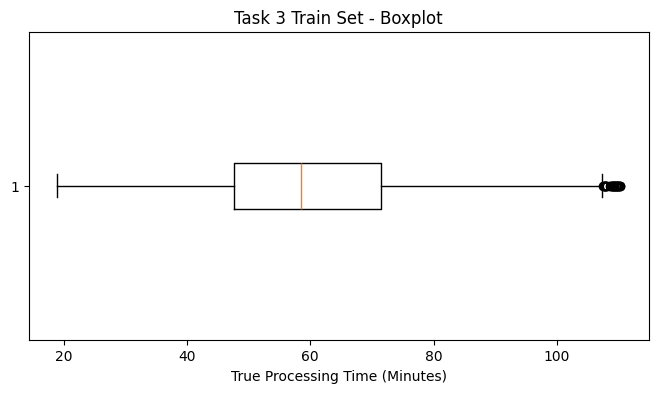

Task 4 Train Set - Outlier Count: 21


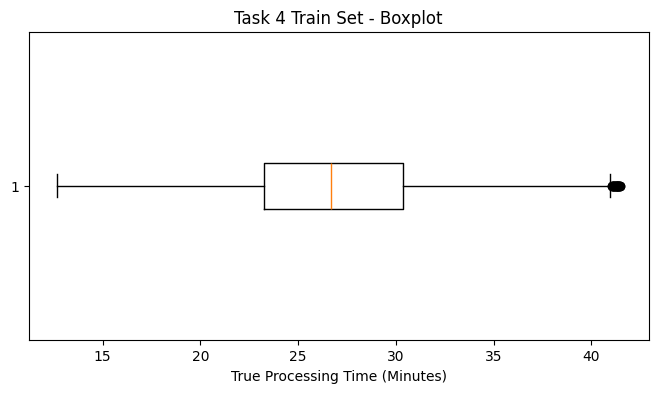

Task 5 Train Set - Outlier Count: 27


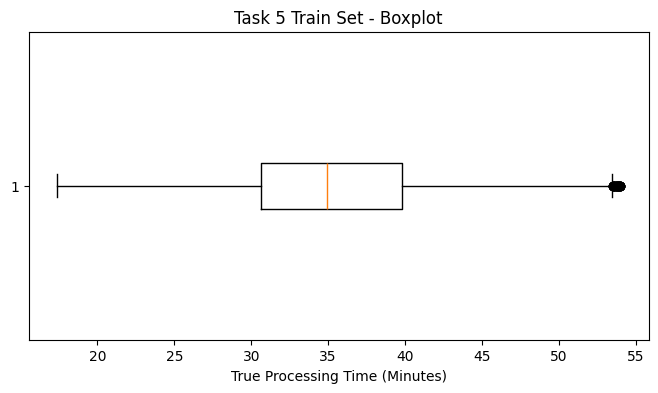

Task 6 Train Set - Outlier Count: 22


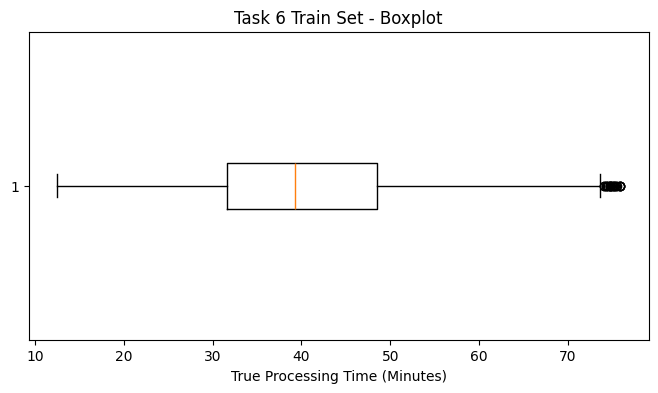

Task 7 Train Set - Outlier Count: 53


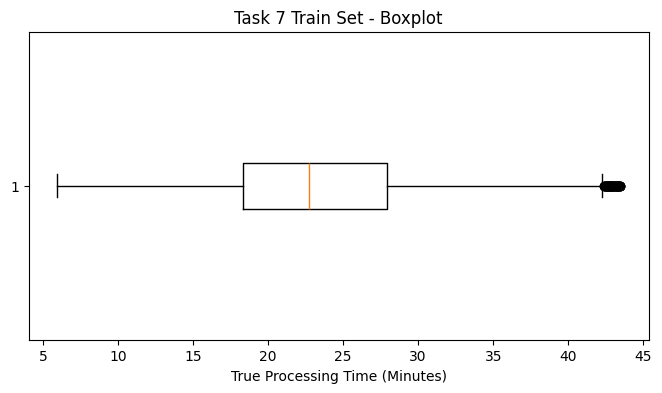

Task 8 Train Set - Outlier Count: 31


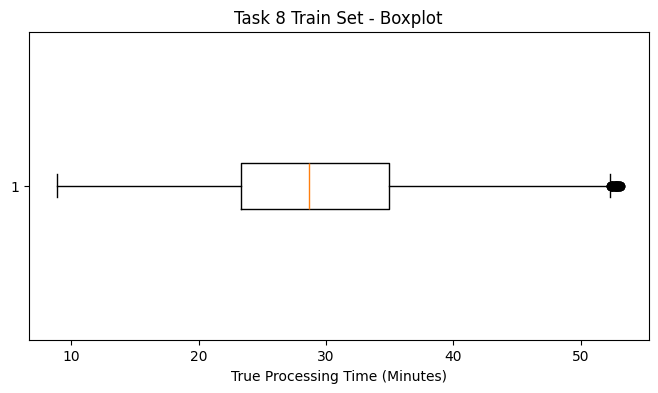

Task 9 Train Set - Outlier Count: 15


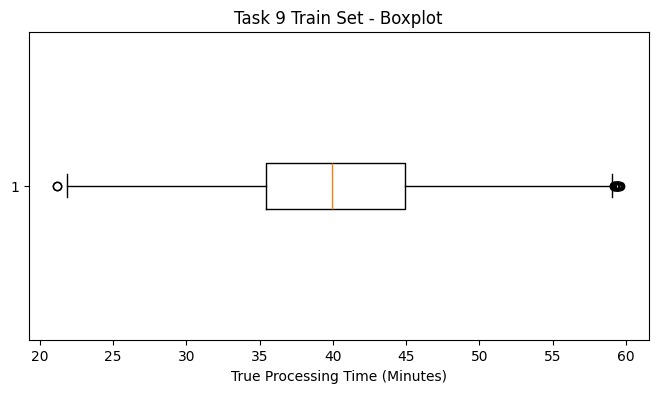

Task 10 Train Set - Outlier Count: 28


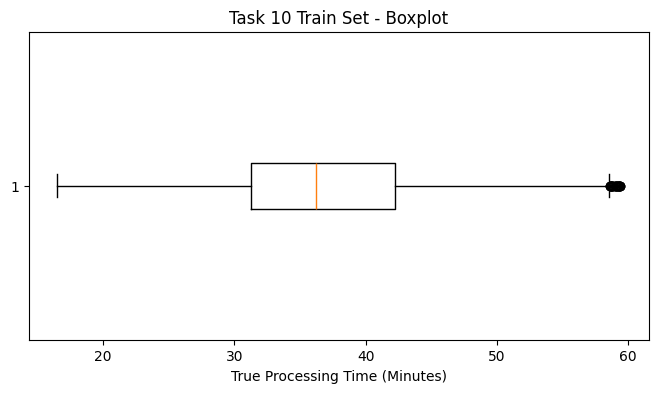

Task 11 Train Set - Outlier Count: 14


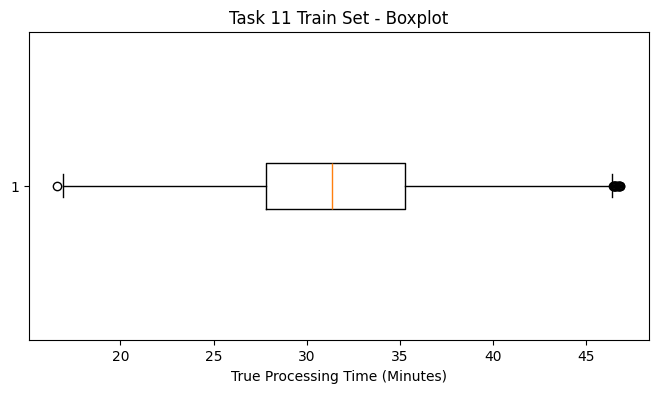

Task 12 Train Set - Outlier Count: 10


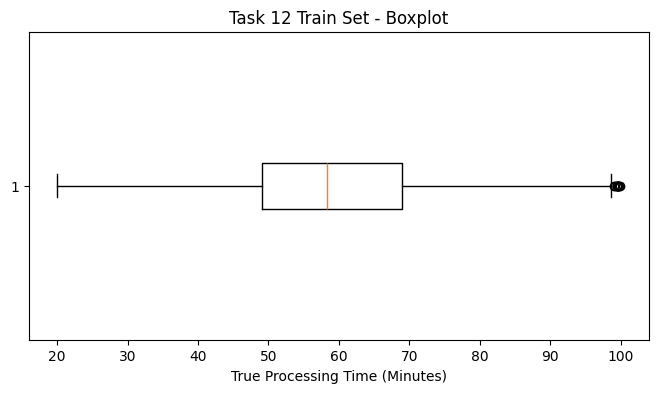

Task 13 Train Set - Outlier Count: 64


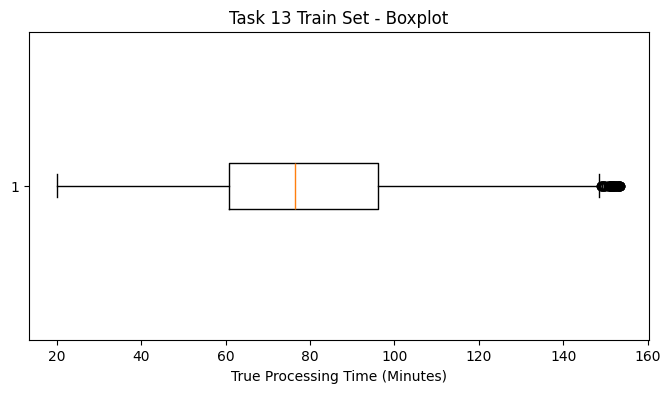

Task 14 Train Set - Outlier Count: 16


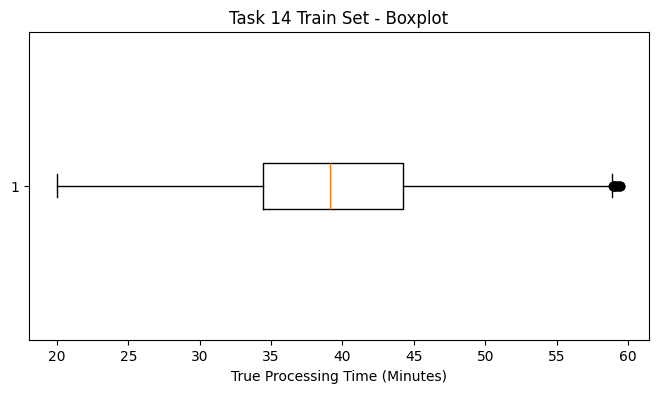

Task 15 Train Set - Outlier Count: 37


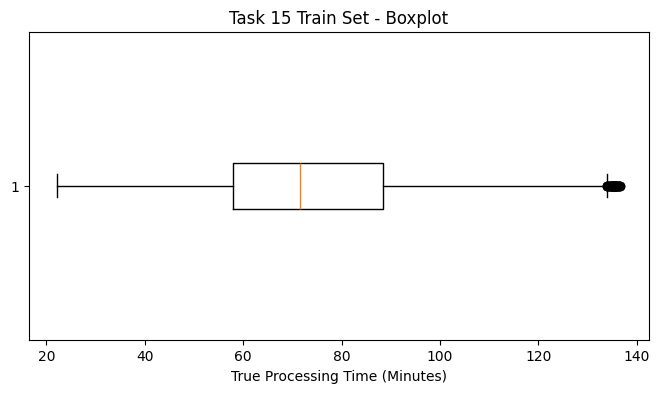

Task 16 Train Set - Outlier Count: 13


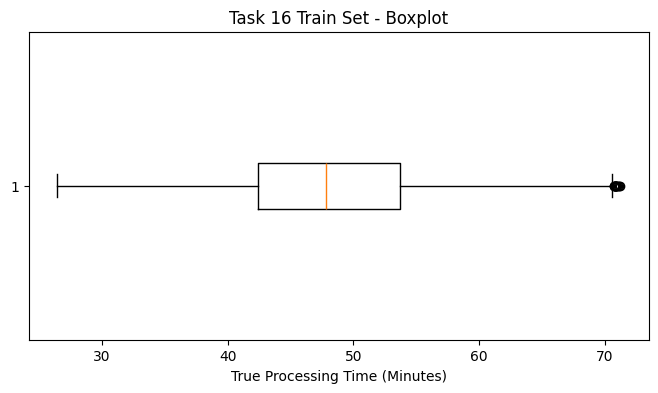

Task 17 Train Set - Outlier Count: 30


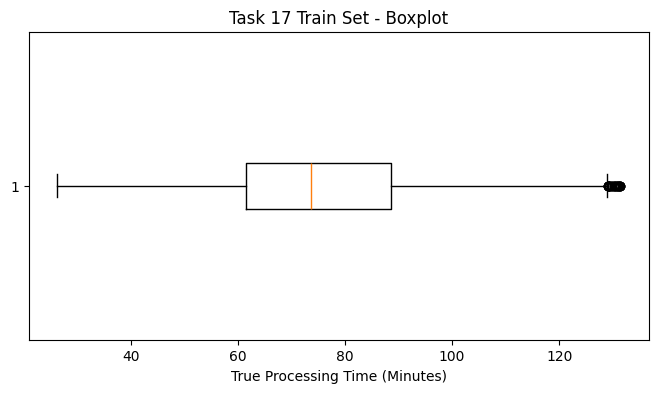

Task 18 Train Set - Outlier Count: 19


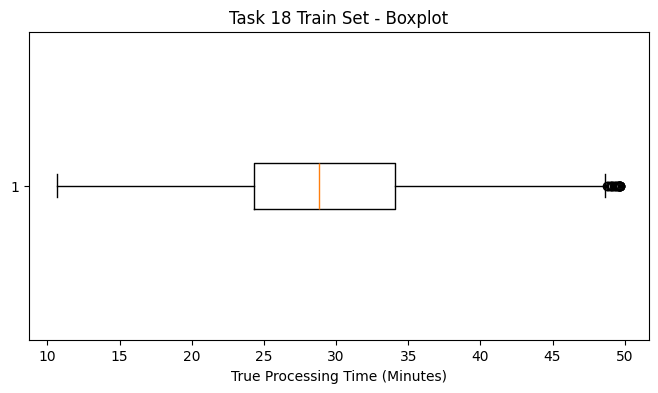

Task 19 Train Set - Outlier Count: 27


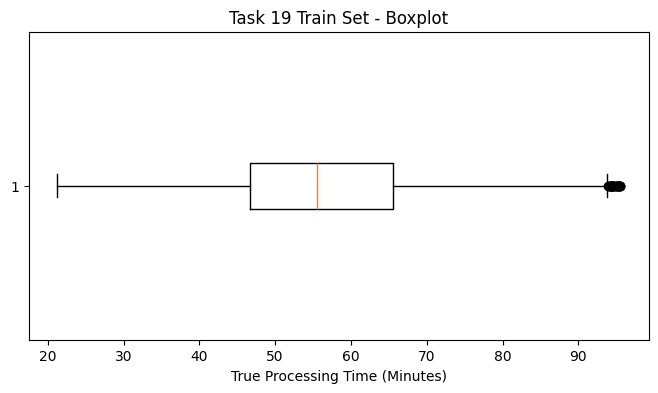

In [35]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Check for outliers in each dataset
for i, df in enumerate(all_train_datasets_for_tasks, start=1):
    outlier_count = detect_outliers_iqr(df['true_processing_time_minutes'])
    print(f"Task {i} Train Set - Outlier Count: {outlier_count}")
    plt.figure(figsize=(8, 4))
    plt.boxplot(df['true_processing_time_minutes'], vert=False)
    plt.title(f"Task {i} Train Set - Boxplot")
    plt.xlabel("True Processing Time (Minutes)")
    plt.show()

removing outliers

In [36]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].reset_index(drop=True)

# Remove outliers from each train set
task_1_train = remove_outliers_iqr(task_1_train, 'true_processing_time_minutes')
task_2_train = remove_outliers_iqr(task_2_train, 'true_processing_time_minutes')
task_3_train = remove_outliers_iqr(task_3_train, 'true_processing_time_minutes')
task_4_train = remove_outliers_iqr(task_4_train, 'true_processing_time_minutes')
task_5_train = remove_outliers_iqr(task_5_train, 'true_processing_time_minutes')
task_6_train = remove_outliers_iqr(task_6_train, 'true_processing_time_minutes')
task_7_train = remove_outliers_iqr(task_7_train, 'true_processing_time_minutes')
task_8_train = remove_outliers_iqr(task_8_train, 'true_processing_time_minutes')
task_9_train = remove_outliers_iqr(task_9_train, 'true_processing_time_minutes')
task_10_train = remove_outliers_iqr(task_10_train, 'true_processing_time_minutes')
task_11_train = remove_outliers_iqr(task_11_train, 'true_processing_time_minutes')
task_12_train = remove_outliers_iqr(task_12_train, 'true_processing_time_minutes')
task_13_train = remove_outliers_iqr(task_13_train, 'true_processing_time_minutes')
task_14_train = remove_outliers_iqr(task_14_train, 'true_processing_time_minutes')
task_15_train = remove_outliers_iqr(task_15_train, 'true_processing_time_minutes')
task_16_train = remove_outliers_iqr(task_16_train, 'true_processing_time_minutes')
task_17_train = remove_outliers_iqr(task_17_train, 'true_processing_time_minutes')
task_18_train = remove_outliers_iqr(task_18_train, 'true_processing_time_minutes')
task_19_train = remove_outliers_iqr(task_19_train, 'true_processing_time_minutes')

# Update the array of all train datasets
all_train_datasets_for_tasks = [
    task_1_train,
    task_2_train,
    task_3_train,
    task_4_train,
    task_5_train,
    task_6_train,
    task_7_train,
    task_8_train,
    task_9_train,
    task_10_train,
    task_11_train,
    task_12_train,
    task_13_train,
    task_14_train,
    task_15_train,
    task_16_train,
    task_17_train,
    task_18_train,
    task_19_train
]

Task 1 Train Set - Outlier Count: 1


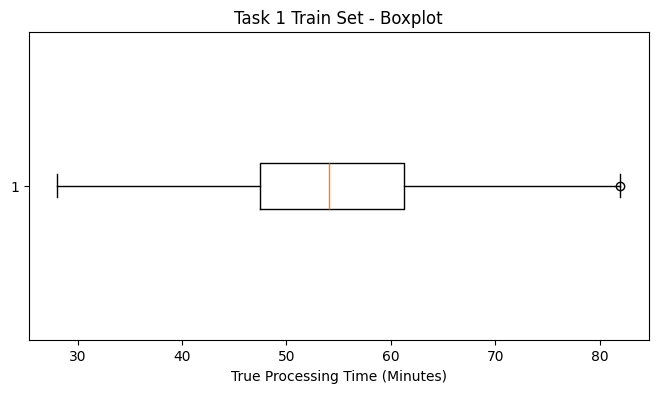

Task 2 Train Set - Outlier Count: 1


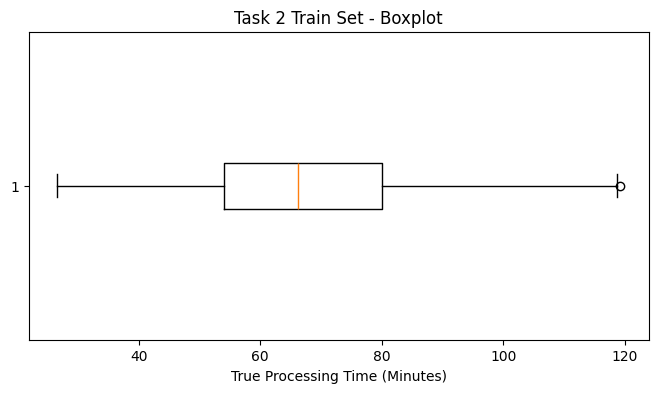

Task 3 Train Set - Outlier Count: 9


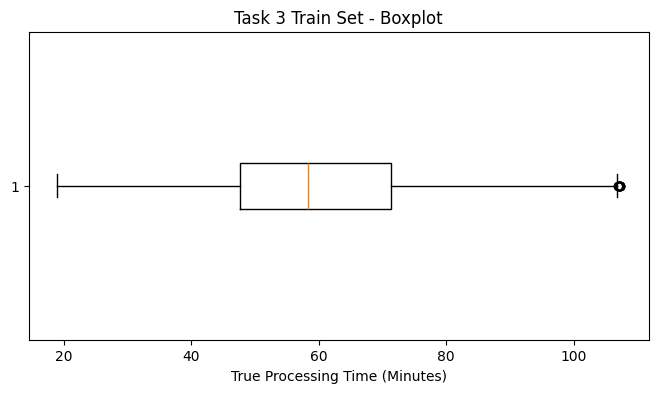

Task 4 Train Set - Outlier Count: 3


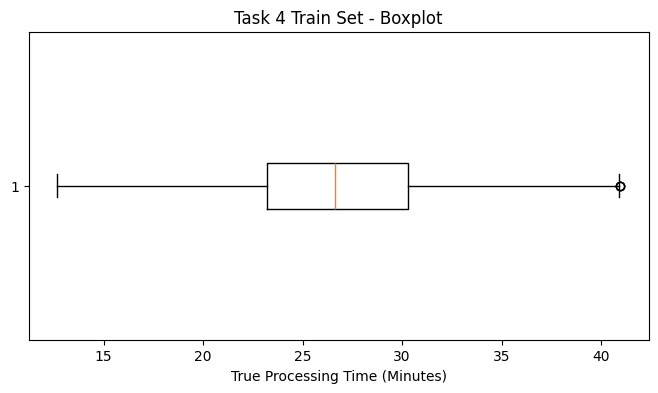

Task 5 Train Set - Outlier Count: 3


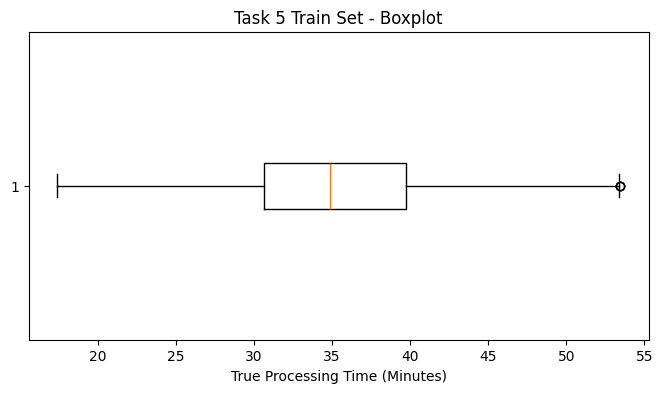

Task 6 Train Set - Outlier Count: 5


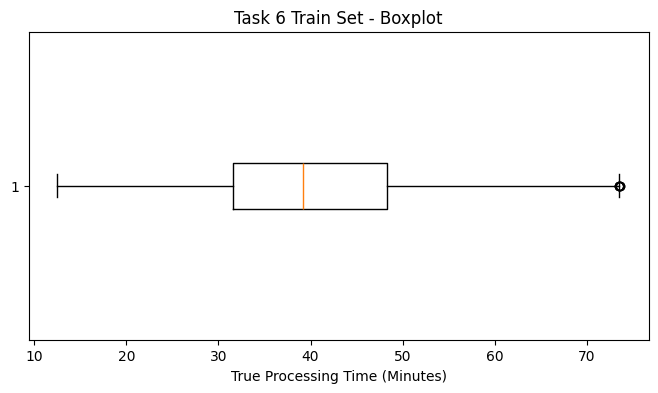

Task 7 Train Set - Outlier Count: 6


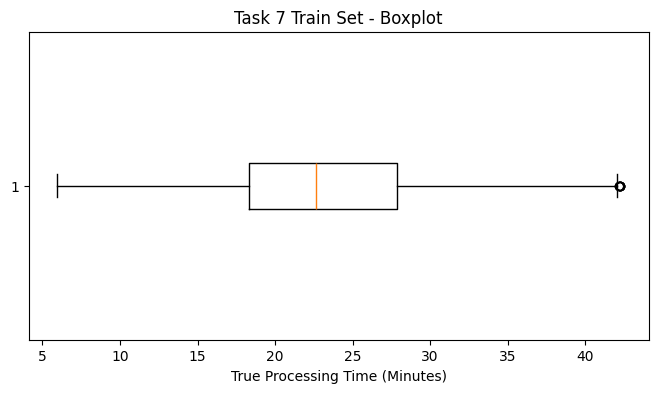

Task 8 Train Set - Outlier Count: 11


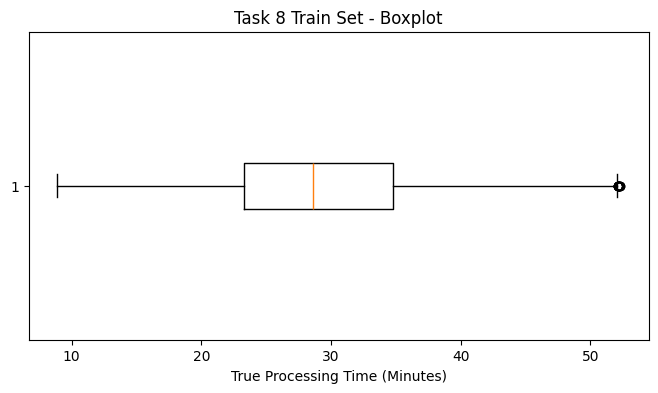

Task 9 Train Set - Outlier Count: 3


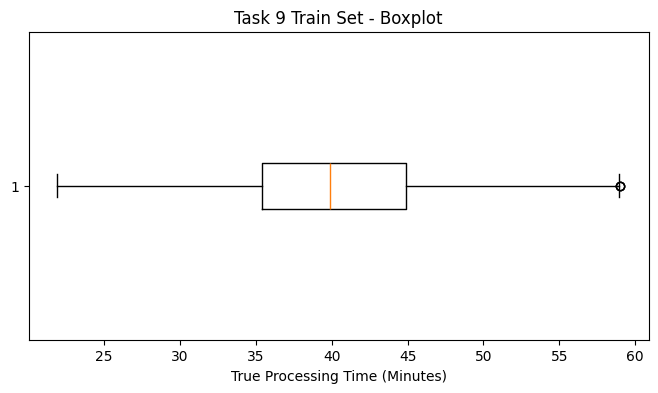

Task 10 Train Set - Outlier Count: 6


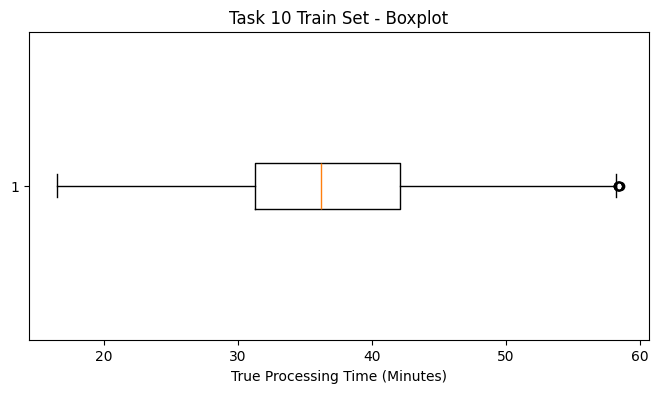

Task 11 Train Set - Outlier Count: 0


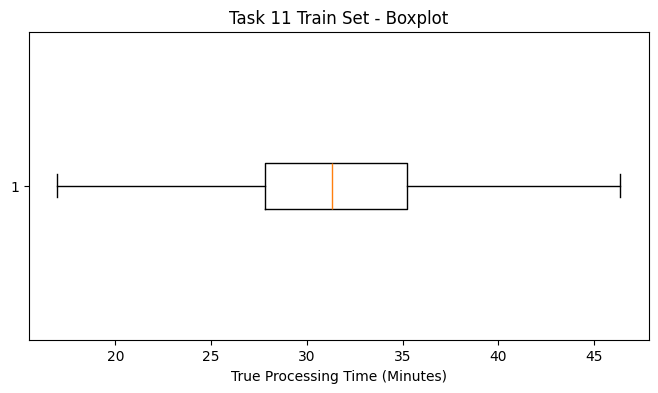

Task 12 Train Set - Outlier Count: 0


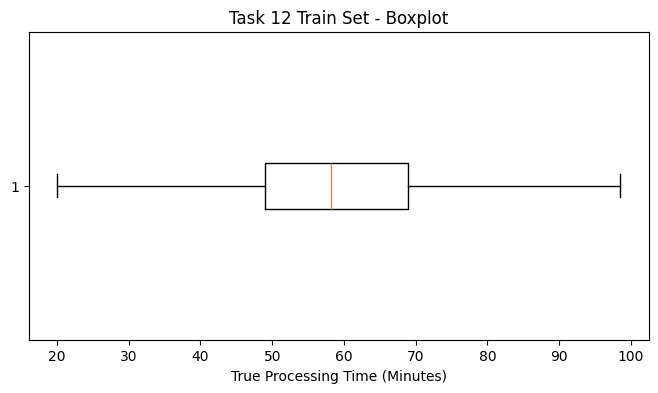

Task 13 Train Set - Outlier Count: 15


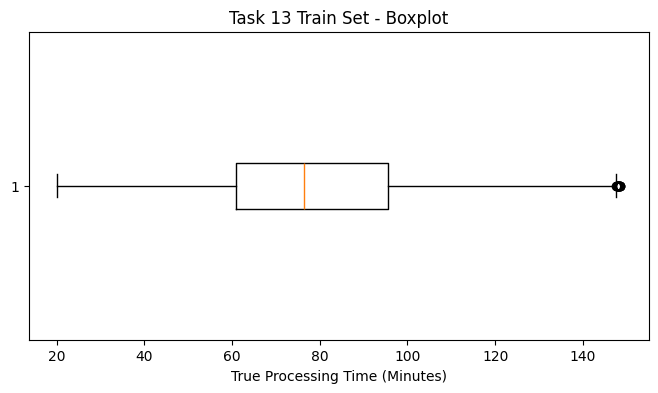

Task 14 Train Set - Outlier Count: 2


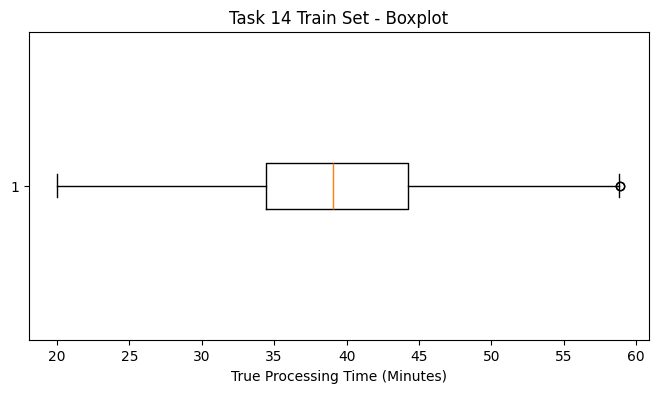

Task 15 Train Set - Outlier Count: 8


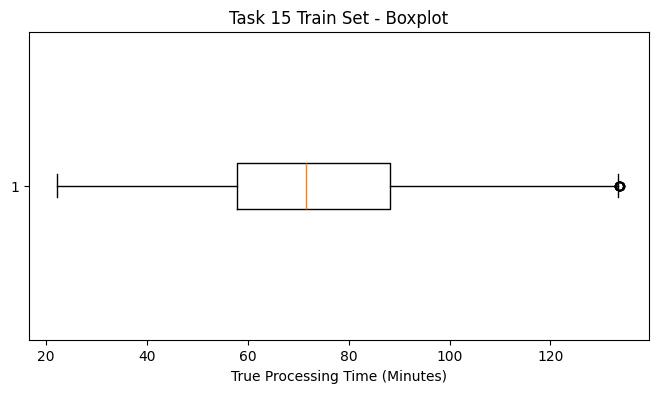

Task 16 Train Set - Outlier Count: 0


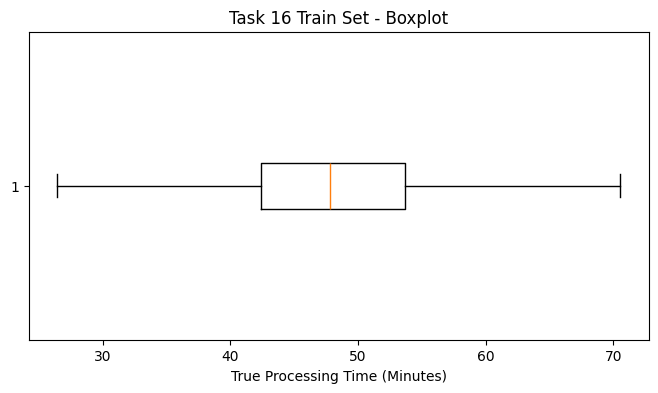

Task 17 Train Set - Outlier Count: 3


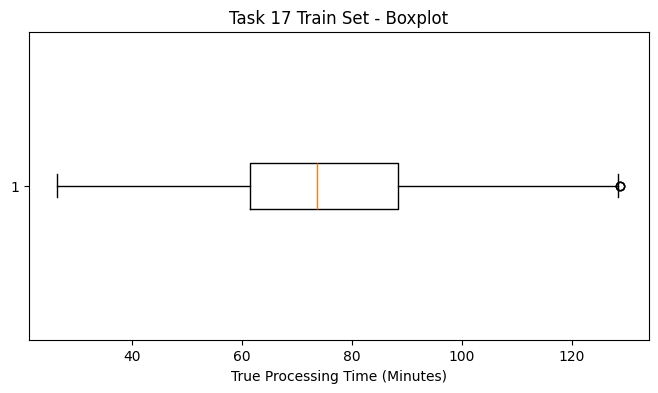

Task 18 Train Set - Outlier Count: 3


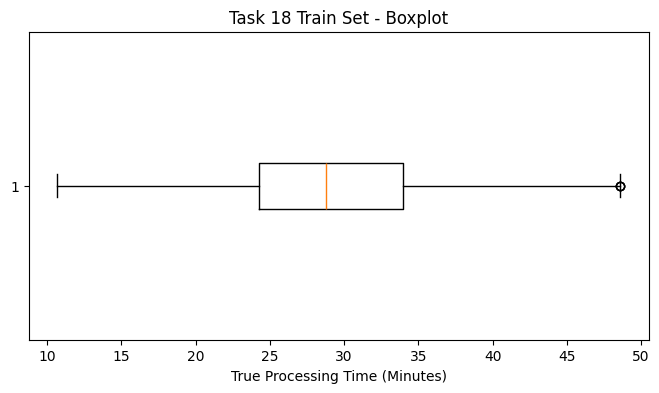

Task 19 Train Set - Outlier Count: 4


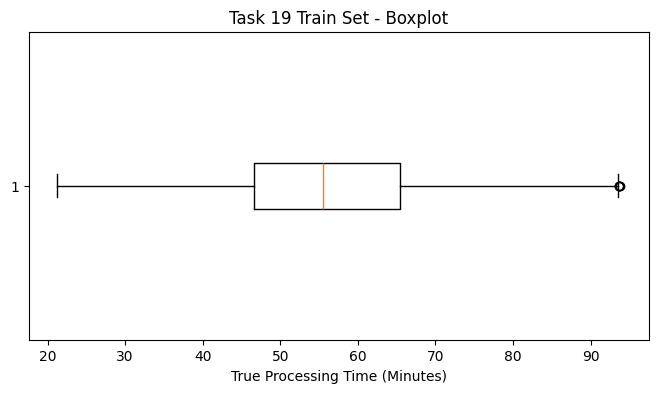

In [37]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Check for outliers in each dataset
for i, df in enumerate(all_train_datasets_for_tasks, start=1):
    outlier_count = detect_outliers_iqr(df['true_processing_time_minutes'])
    print(f"Task {i} Train Set - Outlier Count: {outlier_count}")
    plt.figure(figsize=(8, 4))
    plt.boxplot(df['true_processing_time_minutes'], vert=False)
    plt.title(f"Task {i} Train Set - Boxplot")
    plt.xlabel("True Processing Time (Minutes)")
    plt.show()

## Meging datasets into one (TODO)

In [66]:
sections_data = {
    "Vehicle Registration": [
        "Register new motor vehicles and issue registration numbers.",
        "Process the transfer of vehicle ownership."
    ],
    "Driver Licensing": [
        "Conduct theoretical and practical examinations for new driver's licenses.",
        "Process the renewal and reissue of driving licenses.",
        "Issue international driving permits.",
        "Manage license endorsements for different vehicle classes."
    ],
    "Vehicle Licensing & Revenue": [
        "Issue annual revenue licenses for all types of vehicles.",
        "Collect road taxes and other government levies on vehicles.",
        "Process refunds for overpaid taxes or surrendered licenses."
    ],
    "Technical Inspection & Fitness": [
        "Conduct vehicle inspections for roadworthiness and emissions.",
        "Maintain records of vehicle modifications and certifications.",
        "Issue vehicle fitness certificates (VFC) for commercial vehicles."
    ],
    "Public Information & Services": [
        "Provide access to online services for license and registration checks.",
        "Manage public inquiries and complaints related to traffic regulations.",
        "Publish reports and statistics on vehicle registrations."
    ],
    "Road Safety & Law Enforcement": [
        "Collaborate with law enforcement on vehicle-related legal matters.",
        "Maintain a database of traffic violations and demerit points for drivers.",
        "Develop and implement road safety awareness campaigns.",
        "Manage the suspension and revocation of driving licenses."
    ]
}

In [67]:
all_task_names = []
all_section_names = []

In [68]:
for section, tasks in sections_data.items():
    for task in tasks:
        all_task_names.append(task)
        all_section_names.append(section)

In [69]:
all_task_names

['Register new motor vehicles and issue registration numbers.',
 'Process the transfer of vehicle ownership.',
 "Conduct theoretical and practical examinations for new driver's licenses.",
 'Process the renewal and reissue of driving licenses.',
 'Issue international driving permits.',
 'Manage license endorsements for different vehicle classes.',
 'Issue annual revenue licenses for all types of vehicles.',
 'Collect road taxes and other government levies on vehicles.',
 'Process refunds for overpaid taxes or surrendered licenses.',
 'Conduct vehicle inspections for roadworthiness and emissions.',
 'Maintain records of vehicle modifications and certifications.',
 'Issue vehicle fitness certificates (VFC) for commercial vehicles.',
 'Provide access to online services for license and registration checks.',
 'Manage public inquiries and complaints related to traffic regulations.',
 'Publish reports and statistics on vehicle registrations.',
 'Collaborate with law enforcement on vehicle-re

In [70]:
all_section_names

['Vehicle Registration',
 'Vehicle Registration',
 'Driver Licensing',
 'Driver Licensing',
 'Driver Licensing',
 'Driver Licensing',
 'Vehicle Licensing & Revenue',
 'Vehicle Licensing & Revenue',
 'Vehicle Licensing & Revenue',
 'Technical Inspection & Fitness',
 'Technical Inspection & Fitness',
 'Technical Inspection & Fitness',
 'Public Information & Services',
 'Public Information & Services',
 'Public Information & Services',
 'Road Safety & Law Enforcement',
 'Road Safety & Law Enforcement',
 'Road Safety & Law Enforcement',
 'Road Safety & Law Enforcement']